In [34]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Загрузка данных
data = pd.read_csv('House_Rent_Dataset.csv')

# Очистка данных от null значений
data_cleaned = data.dropna()

# Кодирование категориальных признаков
label_encoders = {}
categorical_columns = ['Posted On', 'Floor', 'Area Type', 'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred', 'Point of Contact']

for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    data_cleaned[column] = label_encoders[column].fit_transform(data_cleaned[column])

# проверка, что вре работает
data_cleaned.head(15)

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,26,2,10000,1100,455,2,221,4,2,1,2,2
1,21,2,20000,800,14,2,1527,4,1,1,1,2
2,24,2,17000,1000,14,2,1760,4,1,1,1,2
3,73,2,10000,800,10,2,526,4,2,1,1,2
4,17,2,7500,850,10,1,1890,4,2,0,1,2
5,7,2,7000,600,447,2,1975,4,2,1,2,2
6,60,2,10000,700,458,2,1184,4,2,0,2,0
7,60,1,5000,250,10,2,1184,4,2,0,1,0
8,46,2,26000,800,10,1,1476,4,2,0,2,0
9,59,2,10000,1000,14,1,1358,4,1,1,2,2


In [35]:
# Разделение данных на признаки и целевую переменную
X = data_cleaned.drop('Rent', axis=1) # это признаки
y = data_cleaned['Rent'] # целевая переменная

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3796, 11), (950, 11), (3796,), (950,))

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, precision_recall_curve, log_loss
import matplotlib.pyplot as plt
# Обучение модели KNN с произвольным гиперпараметром K
k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred = knn.predict(X_test)
y_prob = knn.predict_proba(X_test)


In [11]:
print(y_prob)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [13]:

# Оценка качества модели
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Initial Model - Accuracy: {accuracy:.2f}')
print(f'Initial Model - Confusion Matrix:\n{conf_matrix}')
print(f'Initial Model - Precision: {precision:.2f}')
print(f'Initial Model - Recall: {recall:.2f}')
print(f'Initial Model - F1 Score: {f1:.2f}')
print(
    ''' 
Accuracy: Доля правильно предсказанных классов среди всех предсказаний.
Confusion Matrix: Матрица ошибок, показывающая количество правильных и неправильных предсказаний для каждого класса.
Precision: Точность, показывающая долю правильных положительных предсказаний среди всех положительных предсказаний.
Recall: Полнота, показывающая долю правильных положительных предсказаний среди всех истинных положительных значений.
F1 Score: Среднее гармоническое значение точности и полноты, которое учитывает как ложные положительные, так и ложные отрицательные предсказания.
    '''
)

Initial Model - Accuracy: 0.05
Initial Model - Confusion Matrix:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Initial Model - Precision: 0.04
Initial Model - Recall: 0.05
Initial Model - F1 Score: 0.04
 
Accuracy: Доля правильно предсказанных классов среди всех предсказаний.
Confusion Matrix: Матрица ошибок, показывающая количество правильных и неправильных предсказаний для каждого класса.
Precision: Точность, показывающая долю правильных положительных предсказаний среди всех положительных предсказаний.
Recall: Полнота, показывающая долю правильных положительных предсказаний среди всех истинных положительных значений.
F1 Score: Среднее гармоническое значение точности и полноты, которое учитывает как ложные положительные, так и ложные отрицательные предсказания.
    


c:\Users\karamel\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\karamel\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [17]:

# Масштабирование данных (KNN чувствителен к масштабу)
from sklearn.discriminant_analysis import StandardScaler


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Подбор гиперпараметра K с использованием GridSearchCV
param_grid = {'n_neighbors': np.arange(1, 31)}
grid_search = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)


GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])},
             scoring='neg_mean_squared_error')

In [ ]:

# Оценка качества оптимальной модели
from sklearn.metrics import mean_absolute_error

best_knn = grid_search.best_estimator_
y_pred_best = best_knn.predict(X_test_scaled)

# Метрики для регрессии
mse_best = mean_squared_error(y_test, y_pred_best)
mae_best = mean_absolute_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

print(f'GridSearchCV - Best K: {grid_search.best_params_["n_neighbors"]}')
print(f'GridSearchCV - Mean Squared Error: {mse_best:.2f}')
print(f'GridSearchCV - Mean Absolute Error: {mae_best:.2f}')
print(f'GridSearchCV - R2 Score: {r2_best:.2f}')

GridSearchCV - Best K: 30
GridSearchCV - Mean Squared Error: 1638250657.61
GridSearchCV - Mean Absolute Error: 14483.81
GridSearchCV - R2 Score: 0.59


In [21]:
# Подбор гиперпараметра K с использованием RandomizedSearchCV
random_search = RandomizedSearchCV(KNeighborsClassifier(), param_distributions=param_grid, n_iter=30, cv=5, scoring='accuracy', random_state=42)
random_search.fit(X_train, y_train)

# Оценка качества оптимальной модели
best_knn_random = random_search.best_estimator_
# Подбор гиперпараметра K с использованием RandomizedSearchCV
random_search = RandomizedSearchCV(KNeighborsRegressor(), param_distributions=param_grid, n_iter=30, cv=5, scoring='neg_mean_squared_error', random_state=42)
random_search.fit(X_train_scaled, y_train)

# Оценка качества оптимальной модели
best_knn_random = random_search.best_estimator_
y_pred_best_random = best_knn_random.predict(X_test_scaled)

# Метрики для регрессии
mse_best_random = mean_squared_error(y_test, y_pred_best_random)
mae_best_random = mean_absolute_error(y_test, y_pred_best_random)
r2_best_random = r2_score(y_test, y_pred_best_random)

print(f'RandomizedSearchCV - Best K: {random_search.best_params_["n_neighbors"]}')
print(f'RandomizedSearchCV - Mean Squared Error: {mse_best_random:.2f}')
print(f'RandomizedSearchCV - Mean Absolute Error: {mae_best_random:.2f}')
print(f'RandomizedSearchCV - R2 Score: {r2_best_random:.2f}')






c:\Users\karamel\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


RandomizedSearchCV - Best K: 30
RandomizedSearchCV - Mean Squared Error: 1638250657.61
RandomizedSearchCV - Mean Absolute Error: 14483.81
RandomizedSearchCV - R2 Score: 0.59


In [22]:

# Кросс-валидация с использованием GridSearchCV
cross_val_scores = cross_val_score(grid_search.best_estimator_, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
cross_val_mse = -cross_val_scores.mean()
cross_val_std = cross_val_scores.std()

print(f'Cross-Validation (GridSearchCV) - Mean Squared Error: {cross_val_mse:.2f} ± {cross_val_std:.2f}')


Cross-Validation (GridSearchCV) - Mean Squared Error: 4576576121.99 ± 6061703836.04


In [23]:

# Кросс-валидация с использованием RandomizedSearchCV
cross_val_scores_random = cross_val_score(random_search.best_estimator_, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
cross_val_mse_random = -cross_val_scores_random.mean()
cross_val_std_random = cross_val_scores_random.std()

print(f'Cross-Validation (RandomizedSearchCV) - Mean Squared Error: {cross_val_mse_random:.2f} ± {cross_val_std_random:.2f}')

Cross-Validation (RandomizedSearchCV) - Mean Squared Error: 4576576121.99 ± 6061703836.04


                   Importance
Size                 0.183763
City                 0.110493
Bathroom             0.109259
Point of Contact     0.086579
BHK                  0.075634
Area Type            0.017284
Furnishing Status    0.014969
Posted On           -0.000863
Area Locality       -0.002426
Floor               -0.009802
Tenant Preferred    -0.014229


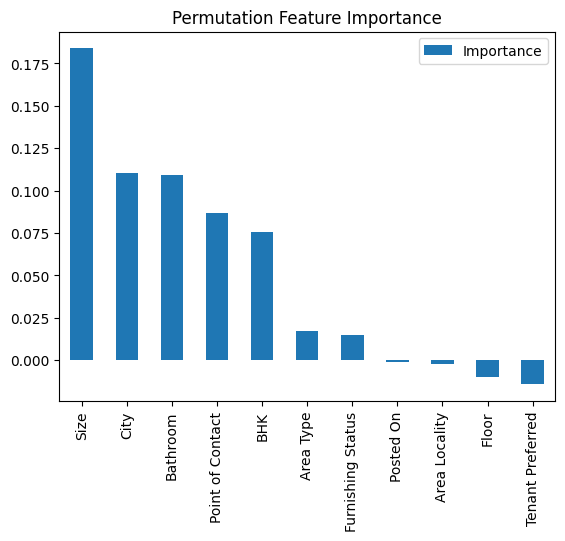

In [25]:
# Оценка важности признаков с использованием пермутационной важности
from sklearn.inspection import permutation_importance


perm_importance = permutation_importance(best_knn, X_test_scaled, y_test, n_repeats=10, random_state=42)

# Вывод важности признаков
feature_importance = pd.DataFrame(perm_importance.importances_mean, index=X.columns, columns=['Importance'])
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
print(feature_importance)

# Визуализация важности признаков
feature_importance.plot(kind='bar')
plt.title('Permutation Feature Importance')
plt.show()

In [36]:
# Оставляем только указанные признаки
selected_features = ['Size', 'City', 'Bathroom', 'Point of Contact', 'BHK']
X = X[selected_features]


# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [37]:

# Масштабирование данных (KNN чувствителен к масштабу)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Подбор гиперпараметра K с использованием GridSearchCV
param_grid = {'n_neighbors': np.arange(1, 31)}
grid_search = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

# Оценка качества оптимальной модели
best_knn = grid_search.best_estimator_
y_pred_best = best_knn.predict(X_test_scaled)


In [38]:
# Метрики для регрессии
mse_best = mean_squared_error(y_test, y_pred_best)
mae_best = mean_absolute_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

print(f'GridSearchCV - Best K: {grid_search.best_params_["n_neighbors"]}')
print(f'GridSearchCV - Mean Squared Error: {mse_best:.2f}')
print(f'GridSearchCV - Mean Absolute Error: {mae_best:.2f}')
print(f'GridSearchCV - R2 Score: {r2_best:.2f}')


GridSearchCV - Best K: 25
GridSearchCV - Mean Squared Error: 1557301500.71
GridSearchCV - Mean Absolute Error: 12625.56
GridSearchCV - R2 Score: 0.61


In [39]:

# Подбор гиперпараметра K с использованием RandomizedSearchCV
random_search = RandomizedSearchCV(KNeighborsRegressor(), param_distributions=param_grid, n_iter=30, cv=5, scoring='neg_mean_squared_error', random_state=42)
random_search.fit(X_train_scaled, y_train)

# Оценка качества оптимальной модели
best_knn_random = random_search.best_estimator_
y_pred_best_random = best_knn_random.predict(X_test_scaled)

# Метрики для регрессии
mse_best_random = mean_squared_error(y_test, y_pred_best_random)
mae_best_random = mean_absolute_error(y_test, y_pred_best_random)
r2_best_random = r2_score(y_test, y_pred_best_random)

print(f'RandomizedSearchCV - Best K: {random_search.best_params_["n_neighbors"]}')
print(f'RandomizedSearchCV - Mean Squared Error: {mse_best_random:.2f}')
print(f'RandomizedSearchCV - Mean Absolute Error: {mae_best_random:.2f}')
print(f'RandomizedSearchCV - R2 Score: {r2_best_random:.2f}')


RandomizedSearchCV - Best K: 25
RandomizedSearchCV - Mean Squared Error: 1557301500.71
RandomizedSearchCV - Mean Absolute Error: 12625.56
RandomizedSearchCV - R2 Score: 0.61


In [40]:

# Кросс-валидация с использованием GridSearchCV
cross_val_scores = cross_val_score(grid_search.best_estimator_, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
cross_val_mse = -cross_val_scores.mean()
cross_val_std = cross_val_scores.std()

print(f'Cross-Validation (GridSearchCV) - Mean Squared Error: {cross_val_mse:.2f} ± {cross_val_std:.2f}')

# Кросс-валидация с использованием RandomizedSearchCV
cross_val_scores_random = cross_val_score(random_search.best_estimator_, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
cross_val_mse_random = -cross_val_scores_random.mean()
cross_val_std_random = cross_val_scores_random.std()

print(f'Cross-Validation (RandomizedSearchCV) - Mean Squared Error: {cross_val_mse_random:.2f} ± {cross_val_std_random:.2f}')

Cross-Validation (GridSearchCV) - Mean Squared Error: 4306810338.59 ± 6025626550.27
Cross-Validation (RandomizedSearchCV) - Mean Squared Error: 4306810338.59 ± 6025626550.27


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

# Загрузка данных
data1 = pd.read_csv('House_Rent_Dataset.csv')

# Очистка данных от null значений
data_cleaned = data1.dropna()

# Кодирование категориальных признаков
label_encoders = {}
categorical_columns = ['Posted On', 'Floor', 'Area Type', 'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred', 'Point of Contact']

for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    data_cleaned[column] = label_encoders[column].fit_transform(data_cleaned[column])

X = data_cleaned.drop('Rent', axis=1)
y = data_cleaned['Rent']

selected_features = ['Size', 'City', 'Bathroom', 'Point of Contact', 'BHK']
X = X[selected_features]

data_combined = pd.concat([X, y], axis=1)

# Удаление выбросов с использованием метода межквартильного размаха (IQR)
Q1 = data_combined.quantile(0.25)
Q3 = data_combined.quantile(0.75)
IQR = Q3 - Q1

data_filtered = data_combined[~((data_combined < (Q1 - 1.5 * IQR)) | (data_combined > (Q3 + 1.5 * IQR))).any(axis=1)]

# Разделение данных на признаки и целевую переменную после удаления выбросов
X_filtered = data_filtered[selected_features]
y_filtered = data_filtered['Rent']

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.2, random_state=42)

# Масштабирование данных (KNN чувствителен к масштабу)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [42]:

# Подбор гиперпараметра K с использованием GridSearchCV
param_grid = {'n_neighbors': np.arange(1, 31)}
grid_search = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

# Оценка качества оптимальной модели
best_knn = grid_search.best_estimator_
y_pred_best = best_knn.predict(X_test_scaled)

# Метрики для регрессии
mse_best = mean_squared_error(y_test, y_pred_best)
mae_best = mean_absolute_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

print(f'GridSearchCV - Best K: {grid_search.best_params_["n_neighbors"]}')
print(f'GridSearchCV - Mean Squared Error: {mse_best:.2f}')
print(f'GridSearchCV - Mean Absolute Error: {mae_best:.2f}')
print(f'GridSearchCV - R2 Score: {r2_best:.2f}')


GridSearchCV - Best K: 13
GridSearchCV - Mean Squared Error: 61384127.73
GridSearchCV - Mean Absolute Error: 5169.47
GridSearchCV - R2 Score: 0.66


In [44]:

# Подбор гиперпараметра K с использованием RandomizedSearchCV
random_search = RandomizedSearchCV(KNeighborsRegressor(), param_distributions=param_grid, n_iter=30, cv=5, scoring='neg_mean_squared_error', random_state=42)
random_search.fit(X_train_scaled, y_train)

# Оценка качества оптимальной модели
best_knn_random = random_search.best_estimator_
y_pred_best_random = best_knn_random.predict(X_test_scaled)

# Метрики для регрессии
mse_best_random = mean_squared_error(y_test, y_pred_best_random)
mae_best_random = mean_absolute_error(y_test, y_pred_best_random)
r2_best_random = r2_score(y_test, y_pred_best_random)

print(f'RandomizedSearchCV - Best K: {random_search.best_params_["n_neighbors"]}')
print(f'RandomizedSearchCV - Mean Squared Error: {mse_best_random:.2f}')
print(f'RandomizedSearchCV - Mean Absolute Error: {mae_best_random:.2f}')
print(f'RandomizedSearchCV - R2 Score: {r2_best_random:.2f}')


RandomizedSearchCV - Best K: 13
RandomizedSearchCV - Mean Squared Error: 61384127.73
RandomizedSearchCV - Mean Absolute Error: 5169.47
RandomizedSearchCV - R2 Score: 0.66


In [43]:

# Кросс-валидация с использованием GridSearchCV
cross_val_scores = cross_val_score(grid_search.best_estimator_, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
cross_val_mse = -cross_val_scores.mean()
cross_val_std = cross_val_scores.std()

print(f'Cross-Validation (GridSearchCV) - Mean Squared Error: {cross_val_mse:.2f} ± {cross_val_std:.2f}')

# Кросс-валидация с использованием RandomizedSearchCV
cross_val_scores_random = cross_val_score(random_search.best_estimator_, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
cross_val_mse_random = -cross_val_scores_random.mean()
cross_val_std_random = cross_val_scores_random.std()

print(f'Cross-Validation (RandomizedSearchCV) - Mean Squared Error: {cross_val_mse_random:.2f} ± {cross_val_std_random:.2f}')

Cross-Validation (GridSearchCV) - Mean Squared Error: 53857990.14 ± 3080795.40
Cross-Validation (RandomizedSearchCV) - Mean Squared Error: 55603640.52 ± 4428949.31
